In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
X_test[:10], y_test[:10]

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [7]:
def plot_predictions(training_data=X_train, training_label=y_train, testing_data=X_test, testing_label=y_test, predictions=None):
    plt.Figure(figsize=(10,7))
    plt.scatter(training_data, training_label, c='b', label='Training')
    plt.scatter(testing_data, testing_label, c='g', label='Testing')
    if predictions is not None:
        plt.scatter(testing_data, predictions, c='r', label='Predictions')
    plt.legend()

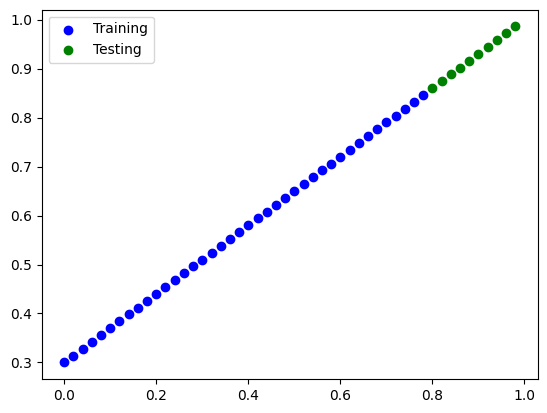

In [8]:
plot_predictions()

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [10]:
torch.manual_seed(42)

model = LinearRegressionModel()
model

LinearRegressionModel()

In [11]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [12]:
weight, bias

(0.7, 0.3)

In [13]:
with torch.inference_mode():
    y_pred = model(X_test)

y_pred, X_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]], dtype=torch.float64),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

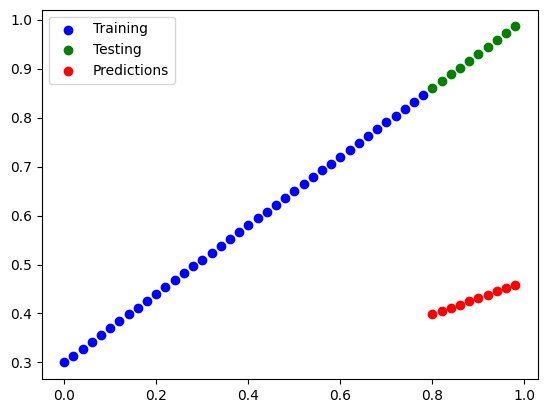

In [14]:
plot_predictions(predictions=y_pred)

In [15]:
loss_fnct = torch.nn.L1Loss()
loss_fnct

L1Loss()

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [17]:
def plot_loss_curves(epochs_count, training_loss_values, testing_loss_values):
    train_loss = np.array(torch.tensor(training_loss_values).numpy())
    test_loss = np.array(torch.tensor(testing_loss_values).numpy())
    
    plt.figure(figsize=(8, 6))
    plt.plot(epochs_count, train_loss, label='Training Loss')
    plt.plot(epochs_count, test_loss, label='Testing Loss')
    plt.title('Testing and Training Loss Curves')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Epochs: 0 | Training Loss: 0.3128813589875055 | Testing Loss: 0.3598261860987429
OrderedDict([('weights', tensor([0.3757], dtype=torch.float64)), ('bias', tensor([0.2288], dtype=torch.float64))])
Epochs: 2 | Training Loss: 0.08682453331835696 | Testing Loss: 0.12174118600419499
OrderedDict([('weights', tensor([0.4522], dtype=torch.float64)), ('bias', tensor([0.3988], dtype=torch.float64))])
Epochs: 4 | Training Loss: 0.046102675453551345 | Testing Loss: 0.09979018537980652
OrderedDict([('weights', tensor([0.4881], dtype=torch.float64)), ('bias', tensor([0.3888], dtype=torch.float64))])
Epochs: 6 | Training Loss: 0.0392125752944114 | Testing Loss: 0.08461918478909466
OrderedDict([('weights', tensor([0.5220], dtype=torch.float64)), ('bias', tensor([0.3738], dtype=torch.float64))])
Epochs: 8 | Training Loss: 0.03232247513527148 | Testing Loss: 0.06944818419838286
OrderedDict([('weights', tensor([0.5559], dtype=torch.float64)), ('bias', tensor([0.3588], dtype=torch.float64))])
Epochs: 10 |

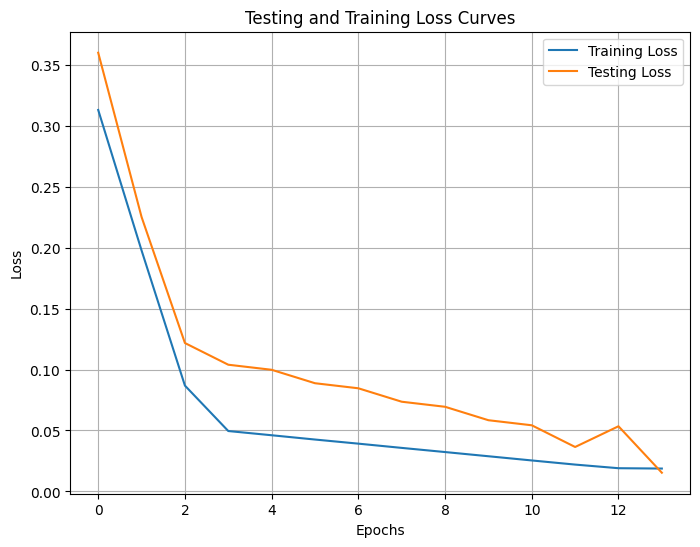

In [18]:
epochs = 14

epochs_count = []
training_loss_values = []
testing_loss_values = []

for epoch in range(epochs):

    model.train()
    training_pred = model(X_train)
    training_loss = loss_fnct(training_pred, y_train)
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()
    model.eval()

    with torch.inference_mode():
        testing_pred = model(X_test)
        testing_loss = loss_fnct(testing_pred, y_test)

    epochs_count.append(epoch)
    training_loss_values.append(training_loss.item())
    testing_loss_values.append(testing_loss.item())

    if epoch % 2 == 0:
        print(f'Epochs: {epoch} | Training Loss: {training_loss.item()} | Testing Loss: {testing_loss.item()}')
        print(model.state_dict())

plot_loss_curves(epochs_count, training_loss_values, testing_loss_values)

In [19]:
with torch.inference_mode():
    y_pred_new = model(X_test)

y_pred_new

tensor([[0.8798],
        [0.8928],
        [0.9058],
        [0.9188],
        [0.9319],
        [0.9449],
        [0.9579],
        [0.9709],
        [0.9840],
        [0.9970]], dtype=torch.float64)

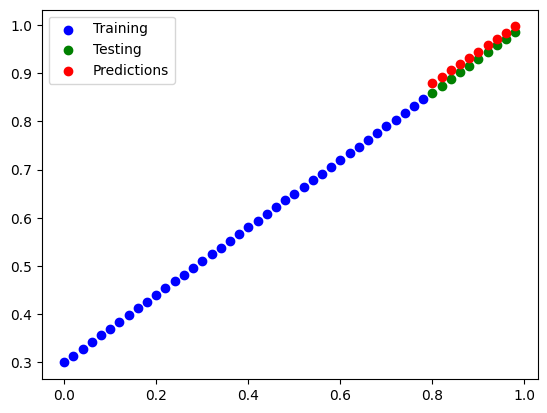

In [20]:
plot_predictions(predictions=y_pred_new)

In [21]:
from pathlib import Path

MODEL_PATH = Path('ready_models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_Simple_Linear_Regression.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('ready_models/01_Simple_Linear_Regression.pth')

In [22]:
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [23]:
model.state_dict()

OrderedDict([('weights', tensor([0.6512], dtype=torch.float64)),
             ('bias', tensor([0.3588], dtype=torch.float64))])

In [24]:
loaded_model = LinearRegressionModel()
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.2345], dtype=torch.float64)),
             ('bias', tensor([0.2303], dtype=torch.float64))])

In [25]:
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6512], dtype=torch.float64)),
             ('bias', tensor([0.3588], dtype=torch.float64))])

In [27]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model(X_test)

loaded_model_0_preds

tensor([[0.8798],
        [0.8928],
        [0.9058],
        [0.9188],
        [0.9319],
        [0.9449],
        [0.9579],
        [0.9709],
        [0.9840],
        [0.9970]], dtype=torch.float64)

In [28]:
y_pred_new == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])